# 불러오기

In [1]:
# 데이터 처리
import pandas as pd
import numpy as np

# 시각화
import matplotlib.pyplot as plt
import seaborn as sns

# 사이킷런: 전처리
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

# 사이킷런: 모델 선택 및 평가
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score

# 사이킷런: 대표 모델
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# 부스팅 계열 모델
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# 기타 (필요 시)
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 1. AppleGothic 경로 지정 (macOS 기본 경로 중 하나)
font_path = "/System/Library/Fonts/Supplemental/AppleGothic.ttf"

# 2. 폰트 로딩
fontprop = fm.FontProperties(fname=font_path)
font_name = fontprop.get_name()

# 3. matplotlib + seaborn 모두 적용
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False
sns.set(font=font_name, style="whitegrid")

In [2]:
df = pd.read_csv('/Users/joyongho/Desktop/code folder/Base.csv')

In [3]:
df.head()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7
3,1,0.9,0.159511,-1,22,50,0.019079,-1.205124,AB,810,...,1,200.0,0,INTERNET,2.047904,linux,0,1,0,7
4,1,0.9,0.596414,-1,218,50,0.004441,-0.773276,AB,890,...,0,1500.0,0,INTERNET,3.775225,macintosh,1,1,0,7


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


In [19]:
df.columns

Index(['fraud_bool', 'income', 'name_email_similarity',
       'prev_address_months_count', 'current_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'phone_mobile_valid', 'bank_months_count',
       'has_other_cards', 'proposed_credit_limit', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_os', 'keep_alive_session',
       'device_distinct_emails_8w', 'device_fraud_count', 'month'],
      dtype='object')

# 결측치 처리

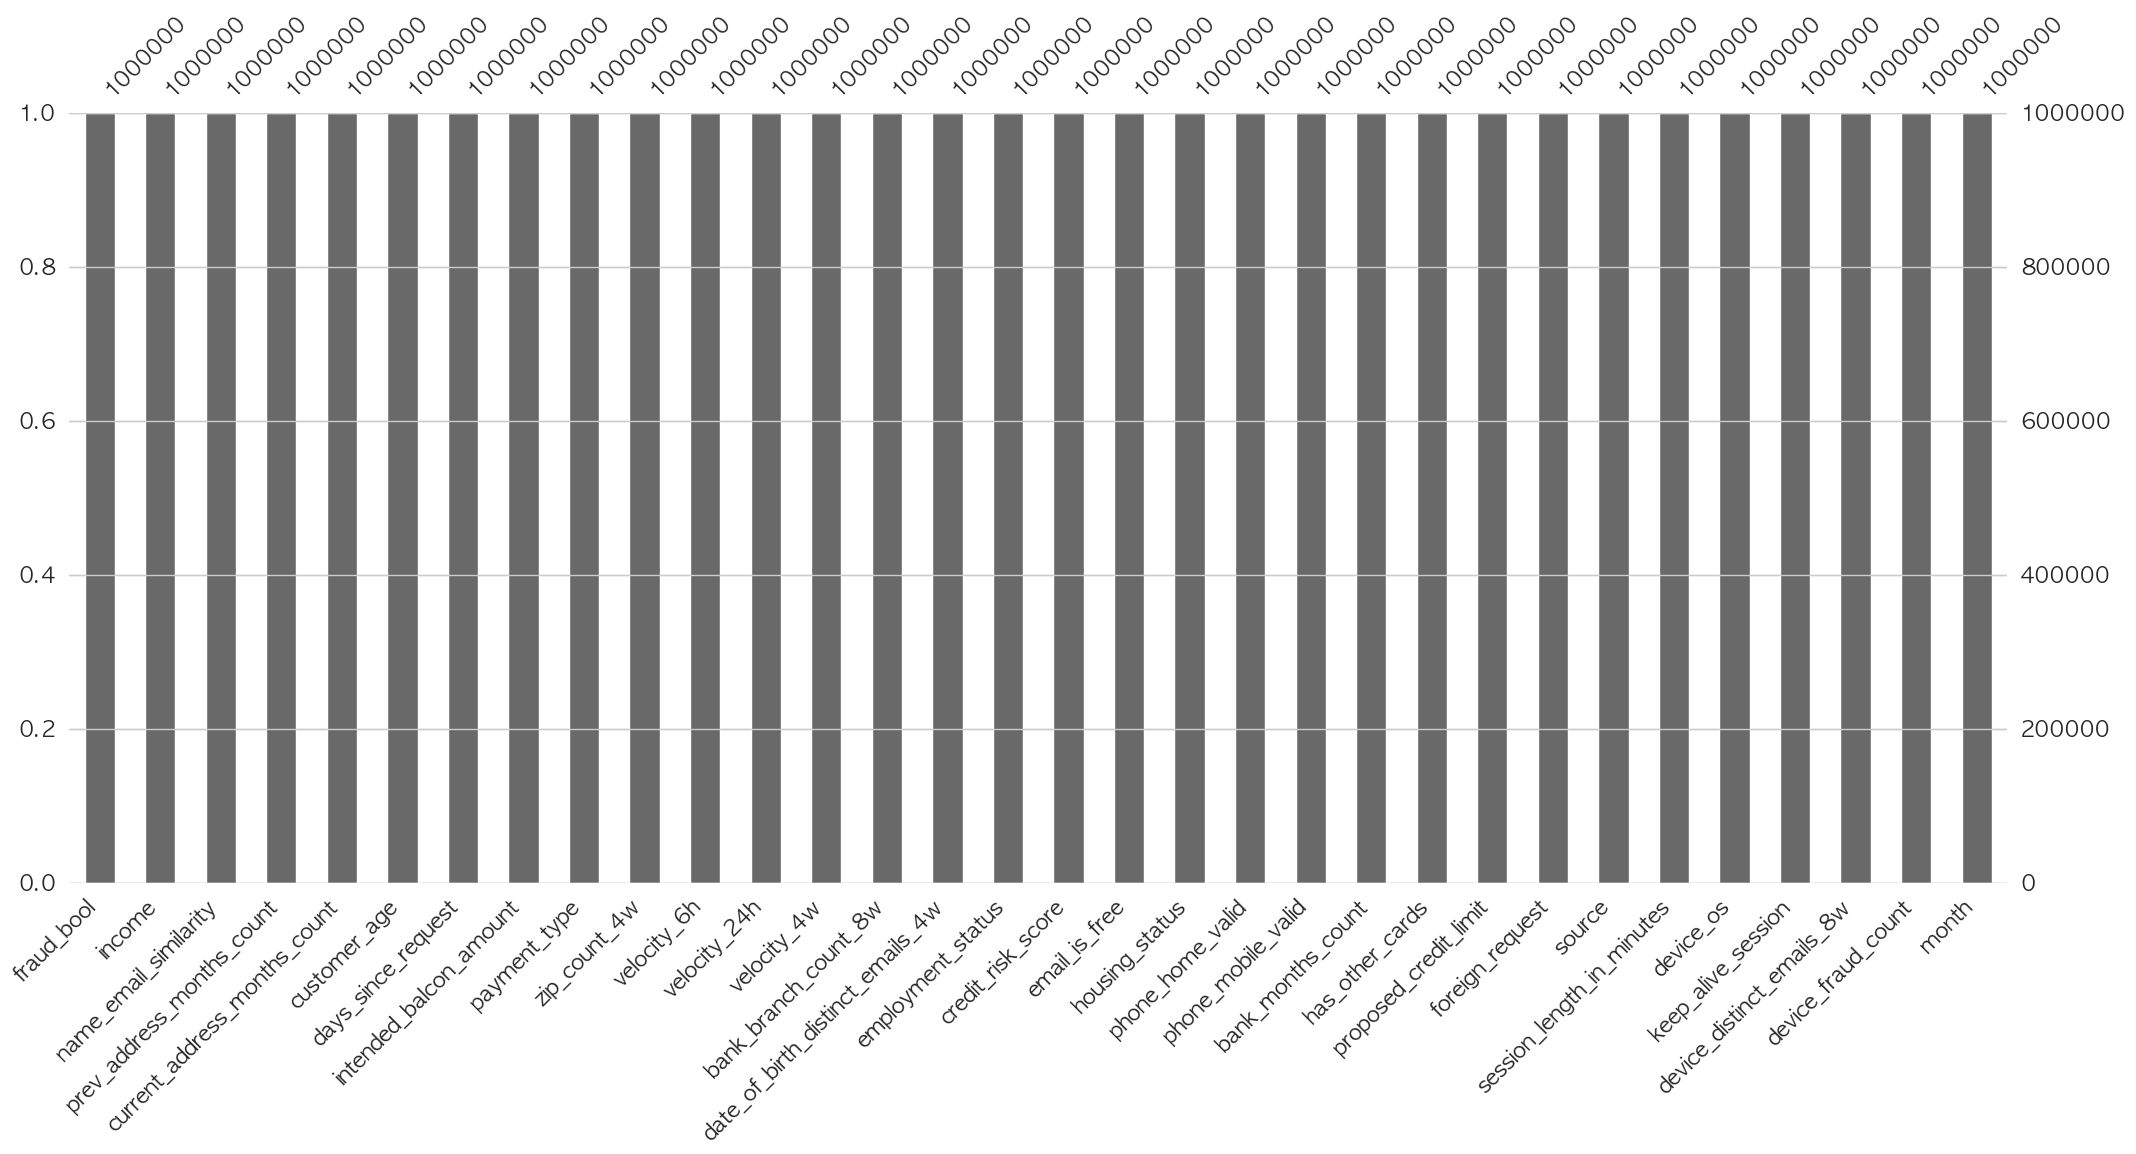

In [9]:
import missingno as msno
plt.figure(figsize=(8, 5))
msno.bar(df)
plt.show()

# EDA

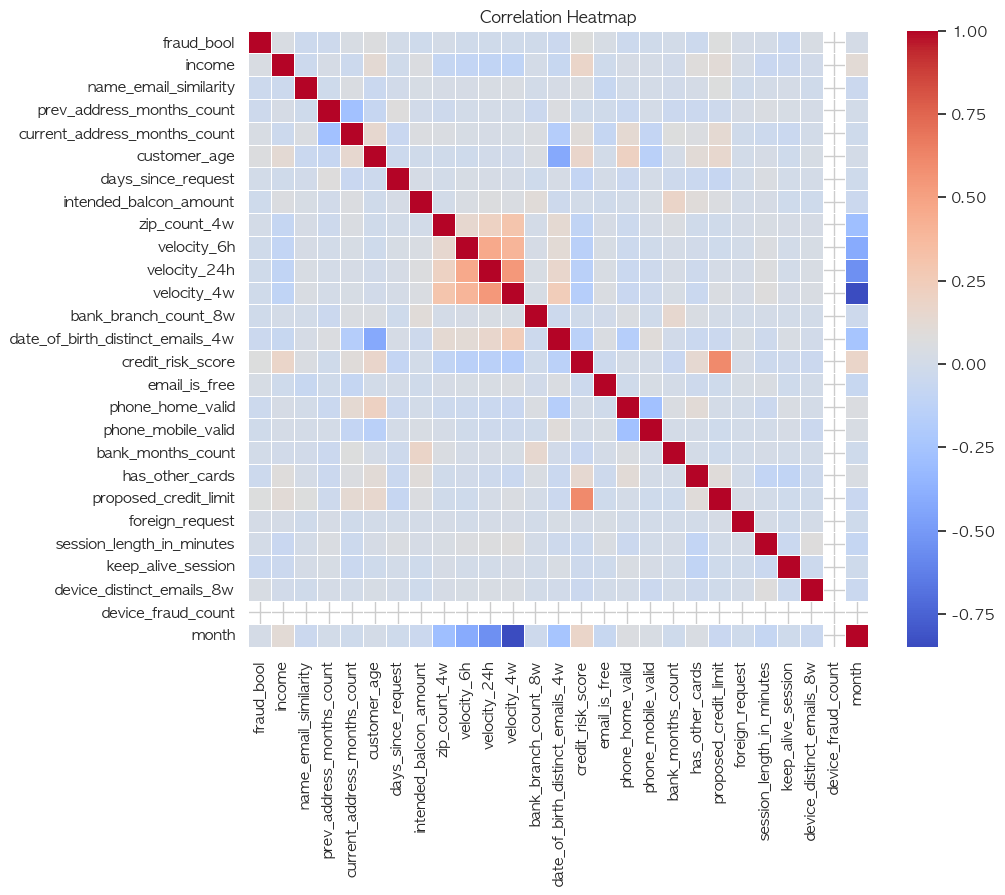

In [11]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [12]:
top_corr_features = corr.abs().unstack().sort_values(ascending=False)
top_corr_features = top_corr_features[top_corr_features < 1].drop_duplicates()
print(top_corr_features.head(10))

month                             velocity_4w              0.848100
credit_risk_score                 proposed_credit_limit    0.606141
velocity_24h                      month                    0.549919
                                  velocity_4w              0.539115
                                  velocity_6h              0.464003
date_of_birth_distinct_emails_4w  customer_age             0.420173
velocity_6h                       month                    0.409148
                                  velocity_4w              0.400254
velocity_4w                       zip_count_4w             0.302955
month                             zip_count_4w             0.287203
dtype: float64


# PCA

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 🎯 타깃 변수 분리
y = df['fraud_bool']
X = df.drop(columns=['fraud_bool'])  # 타깃 제외

# 수치형 변수만 선택
numeric_df = X.select_dtypes(include='number')

# 표준화
scaler = StandardScaler()
scaled = scaler.fit_transform(numeric_df)

# PCA 수행
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(scaled)

print(f'사용된 주성분 수: {pca.n_components_}')
print(f'각 주성분의 설명 분산 비율: {pca.explained_variance_ratio_}')

사용된 주성분 수: 22
각 주성분의 설명 분산 비율: [0.12137486 0.0806992  0.06180179 0.05288378 0.04909316 0.04529936
 0.04398486 0.04230672 0.04078219 0.0393669  0.03846181 0.03705735
 0.03633723 0.03601443 0.0354897  0.03486676 0.03262842 0.03065539
 0.02775634 0.02718423 0.02622207 0.02029109]


# 모델링 (RF)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

X_pca = pca.transform(scaled)
y = df['fraud_bool']  # 타깃값에 맞게 수정

X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)
model = RandomForestClassifier()
model.fit(X_train, y_train)
print(f"Accuracy: {model.score(X_test, y_test)}")


Accuracy: 0.988885


In [23]:
from sklearn.metrics import average_precision_score

# 1. 테스트셋에 대한 양성 클래스(1)의 확률 예측
y_scores = model.predict_proba(X_test)[:, 1]

# 2. Average Precision 계산
ap = average_precision_score(y_test, y_scores)

print(f"Average Precision (AP): {ap:.4f}")


Average Precision (AP): 0.0767


AP 너무 낮음 -> smote할 예정

In [ ]:
# %pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [25]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import average_precision_score

# 1. 수치형 변수만 선택
numeric_df = df.select_dtypes(include='number')
X = numeric_df.drop(columns=['fraud_bool'])  # 타깃 제외
y = df['fraud_bool']

# 2. 표준화
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. SMOTE로 클래스 균형 맞추기
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)


In [26]:
# 4. PCA 수행 (설명 분산 95% 유지)
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_resampled)

# 5. 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_pca, y_resampled, test_size=0.2, random_state=42)

# 6. 모델 학습
model = RandomForestClassifier()
model.fit(X_train, y_train)

# 7. 성능 평가 (AP)
y_scores = model.predict_proba(X_test)[:, 1]
ap = average_precision_score(y_test, y_scores)

print(f"Average Precision (AP): {ap:.4f}")

Average Precision (AP): 0.9996


In [27]:
# 1. Train/Test 먼저 나누기
X = numeric_df.drop(columns=['fraud_bool'])
y = df['fraud_bool']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. 훈련 데이터에만 SMOTE 적용
X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train, y_train)

# 3. PCA는 훈련 데이터로 fit 후, 전체 transform
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)

# 4. 학습 및 평가
model = RandomForestClassifier()
model.fit(X_train_pca, y_train_resampled)
y_scores = model.predict_proba(X_test_pca)[:, 1]
ap = average_precision_score(y_test, y_scores)

print(f"Average Precision (AP): {ap:.4f}")


Average Precision (AP): 0.0686


# 모델링 (LGBM)

In [28]:
from lightgbm import LGBMClassifier
from sklearn.metrics import average_precision_score

# 1. Train/Test 먼저 나누기
X = numeric_df.drop(columns=['fraud_bool'])
y = df['fraud_bool']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 2. 훈련 데이터에만 SMOTE 적용
from imblearn.over_sampling import SMOTE
X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train, y_train)

# 3. PCA는 훈련 데이터로 fit 후, 전체 transform
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_resampled)
X_test_pca = pca.transform(X_test)

In [29]:
# 4. LightGBM 모델 학습 및 평가
model = LGBMClassifier(random_state=42)
model.fit(X_train_pca, y_train_resampled)

y_scores = model.predict_proba(X_test_pca)[:, 1]
ap = average_precision_score(y_test, y_scores)
print(f"Average Precision (AP): {ap:.4f}")

[LightGBM] [Info] Number of positive: 791195, number of negative: 791195
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.051747 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5610
[LightGBM] [Info] Number of data points in the train set: 1582390, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
Average Precision (AP): 0.0870


In [30]:
# PCA 생략
model = LGBMClassifier(random_state=42)
model.fit(X_train_resampled, y_train_resampled)
y_scores = model.predict_proba(X_test)[:, 1]
ap = average_precision_score(y_test, y_scores)
print(f"AP without PCA: {ap:.4f}")

[LightGBM] [Info] Number of positive: 791195, number of negative: 791195
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.044801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5729
[LightGBM] [Info] Number of data points in the train set: 1582390, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
AP without PCA: 0.1051


In [ ]:
# %pip install optuna lightgbm imbalanced-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5/5 [optuna]2m4/5 [optuna]]
Note: you may need to restart the kernel to use updated packages.


In [33]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.metrics import average_precision_score
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# 데이터 전처리
X = numeric_df.drop(columns=['fraud_bool'])
y = df['fraud_bool']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
X_train_resampled, y_train_resampled = SMOTE(random_state=42).fit_resample(X_train, y_train)

# Optuna 목적 함수 정의
def objective(trial):
    params = {
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3, log=True),
        "num_leaves": trial.suggest_int("num_leaves", 16, 256),
        "max_depth": trial.suggest_int("max_depth", 3, 12),
        "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
        "subsample": trial.suggest_float("subsample", 0.5, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0),
        "reg_alpha": trial.suggest_float("reg_alpha", 1e-4, 10.0, log=True),
        "reg_lambda": trial.suggest_float("reg_lambda", 1e-4, 10.0, log=True),
        "random_state": 42,
        "n_jobs": -1,
    }

    model = LGBMClassifier(**params)
    model.fit(X_train_resampled, y_train_resampled)

    y_pred_proba = model.predict_proba(X_test)[:, 1]
    ap = average_precision_score(y_test, y_pred_proba)
    return ap

# Optuna 튜닝 실행
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)

# 최적 결과 출력
print("Best trial:")
print(f"  AP: {study.best_value:.4f}")
print("  Best hyperparameters:")
for key, value in study.best_params.items():
    print(f"    {key}: {value}")


[I 2025-05-31 00:52:53,271] A new study created in memory with name: no-name-10851052-1936-44c2-a49e-6d7015671bad


[LightGBM] [Info] Number of positive: 791177, number of negative: 791177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040898 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5728
[LightGBM] [Info] Number of data points in the train set: 1582354, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[I 2025-05-31 00:53:17,815] Trial 0 finished with value: 0.09005253689708176 and parameters: {'n_estimators': 502, 'learning_rate': 0.048835873953550456, 'num_leaves': 250, 'max_depth': 3, 'min_child_samples': 22, 'subsample': 0.7514495815384574, 'colsample_bytree': 0.8942428924240389, 'reg_alpha': 0.022451268434299697, 'reg_lambda': 0.019760150626145646}. Best is trial 0 with value: 0.09005253689708176.


[LightGBM] [Info] Number of positive: 791177, number of negative: 791177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.074120 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5728
[LightGBM] [Info] Number of data points in the train set: 1582354, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[I 2025-05-31 00:53:46,867] Trial 1 finished with value: 0.09434279927905545 and parameters: {'n_estimators': 359, 'learning_rate': 0.029235818180054315, 'num_leaves': 99, 'max_depth': 6, 'min_child_samples': 76, 'subsample': 0.6263794663695731, 'colsample_bytree': 0.6823865899287419, 'reg_alpha': 0.014376606437775287, 'reg_lambda': 0.1766627507984294}. Best is trial 1 with value: 0.09434279927905545.


[LightGBM] [Info] Number of positive: 791177, number of negative: 791177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.053677 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5728
[LightGBM] [Info] Number of data points in the train set: 1582354, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2025-05-31 00:55:37,274] Trial 2 finished with value: 0.08887267510816557 and parameters: {'n_estimators': 986, 'learning_rate': 0.00188849264640034, 'num_leaves': 93, 'max_depth': 10, 'min_child_samples': 45, 'subsample': 0.6249800691354838, 'colsample_bytree': 0.5446286539987483, 'reg_alpha': 0.0033059040585322027, 'reg_lambda': 0.5879752866076259}. Best is trial 1 with value: 0.09434279927905545.


[LightGBM] [Info] Number of positive: 791177, number of negative: 791177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.095974 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5728
[LightGBM] [Info] Number of data points in the train set: 1582354, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2025-05-31 00:55:57,176] Trial 3 finished with value: 0.07694220089952492 and parameters: {'n_estimators': 121, 'learning_rate': 0.0014680698233355144, 'num_leaves': 198, 'max_depth': 11, 'min_child_samples': 81, 'subsample': 0.8106333452978778, 'colsample_bytree': 0.8105671263437713, 'reg_alpha': 1.9686688964771055, 'reg_lambda': 0.008407626958224461}. Best is trial 1 with value: 0.09434279927905545.


[LightGBM] [Info] Number of positive: 791177, number of negative: 791177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.072540 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5728
[LightGBM] [Info] Number of data points in the train set: 1582354, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[I 2025-05-31 00:56:31,860] Trial 4 finished with value: 0.06556424178160425 and parameters: {'n_estimators': 632, 'learning_rate': 0.0017586726565292133, 'num_leaves': 138, 'max_depth': 3, 'min_child_samples': 59, 'subsample': 0.818343332560955, 'colsample_bytree': 0.6239233772331456, 'reg_alpha': 3.182674410090088, 'reg_lambda': 0.015805705441024425}. Best is trial 1 with value: 0.09434279927905545.


[LightGBM] [Info] Number of positive: 791177, number of negative: 791177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.082976 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5728
[LightGBM] [Info] Number of data points in the train set: 1582354, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[I 2025-05-31 00:56:48,958] Trial 5 finished with value: 0.04742024789573606 and parameters: {'n_estimators': 308, 'learning_rate': 0.001043540847745492, 'num_leaves': 219, 'max_depth': 3, 'min_child_samples': 46, 'subsample': 0.7045666117285929, 'colsample_bytree': 0.9788498809673769, 'reg_alpha': 1.2786101941508232, 'reg_lambda': 1.0814481145671924}. Best is trial 1 with value: 0.09434279927905545.


[LightGBM] [Info] Number of positive: 791177, number of negative: 791177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5728
[LightGBM] [Info] Number of data points in the train set: 1582354, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[I 2025-05-31 00:57:39,764] Trial 6 finished with value: 0.07691720435558787 and parameters: {'n_estimators': 534, 'learning_rate': 0.00257405293938652, 'num_leaves': 187, 'max_depth': 6, 'min_child_samples': 22, 'subsample': 0.5413670481204302, 'colsample_bytree': 0.9818862383773623, 'reg_alpha': 0.0008565784816147507, 'reg_lambda': 0.012070556593069747}. Best is trial 1 with value: 0.09434279927905545.


[LightGBM] [Info] Number of positive: 791177, number of negative: 791177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.077896 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5728
[LightGBM] [Info] Number of data points in the train set: 1582354, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[I 2025-05-31 00:58:24,191] Trial 7 finished with value: 0.08972887227628634 and parameters: {'n_estimators': 501, 'learning_rate': 0.005956320394399248, 'num_leaves': 103, 'max_depth': 6, 'min_child_samples': 72, 'subsample': 0.7124702933870481, 'colsample_bytree': 0.9341439795207861, 'reg_alpha': 0.8677632681581772, 'reg_lambda': 0.0005464958618412309}. Best is trial 1 with value: 0.09434279927905545.


[LightGBM] [Info] Number of positive: 791177, number of negative: 791177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.050253 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5728
[LightGBM] [Info] Number of data points in the train set: 1582354, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2025-05-31 00:59:05,574] Trial 8 finished with value: 0.1117034881026523 and parameters: {'n_estimators': 747, 'learning_rate': 0.1498138544225378, 'num_leaves': 28, 'max_depth': 7, 'min_child_samples': 29, 'subsample': 0.5101339873840691, 'colsample_bytree': 0.5063101807926653, 'reg_alpha': 0.0012113057055494632, 'reg_lambda': 0.00012733408990585015}. Best is trial 8 with value: 0.1117034881026523.


[LightGBM] [Info] Number of positive: 791177, number of negative: 791177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.085026 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5728
[LightGBM] [Info] Number of data points in the train set: 1582354, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[I 2025-05-31 01:00:01,319] Trial 9 finished with value: 0.12402213208443534 and parameters: {'n_estimators': 667, 'learning_rate': 0.0636784160075031, 'num_leaves': 101, 'max_depth': 7, 'min_child_samples': 98, 'subsample': 0.6497538161018627, 'colsample_bytree': 0.955523632576229, 'reg_alpha': 0.7149105030963258, 'reg_lambda': 0.0002541418002646437}. Best is trial 9 with value: 0.12402213208443534.


[LightGBM] [Info] Number of positive: 791177, number of negative: 791177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079634 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5728
[LightGBM] [Info] Number of data points in the train set: 1582354, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2025-05-31 01:00:46,223] Trial 10 finished with value: 0.08819313583372644 and parameters: {'n_estimators': 882, 'learning_rate': 0.2955926391712118, 'num_leaves': 25, 'max_depth': 9, 'min_child_samples': 100, 'subsample': 0.9797959756147043, 'colsample_bytree': 0.8192245050918286, 'reg_alpha': 0.00010409862735782647, 'reg_lambda': 0.0013707939548610122}. Best is trial 9 with value: 0.12402213208443534.


[LightGBM] [Info] Number of positive: 791177, number of negative: 791177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079571 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5728
[LightGBM] [Info] Number of data points in the train set: 1582354, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2025-05-31 01:01:28,152] Trial 11 finished with value: 0.09383856312091693 and parameters: {'n_estimators': 758, 'learning_rate': 0.1376300075948487, 'num_leaves': 21, 'max_depth': 8, 'min_child_samples': 7, 'subsample': 0.5020386901548259, 'colsample_bytree': 0.5442897776672303, 'reg_alpha': 0.15344822063421415, 'reg_lambda': 0.00019931991602764167}. Best is trial 9 with value: 0.12402213208443534.


[LightGBM] [Info] Number of positive: 791177, number of negative: 791177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.094992 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5728
[LightGBM] [Info] Number of data points in the train set: 1582354, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[I 2025-05-31 01:02:24,304] Trial 12 finished with value: 0.12468495422143563 and parameters: {'n_estimators': 727, 'learning_rate': 0.08144113133882176, 'num_leaves': 60, 'max_depth': 7, 'min_child_samples': 100, 'subsample': 0.5915706652959246, 'colsample_bytree': 0.7255519025139558, 'reg_alpha': 0.1945650236622584, 'reg_lambda': 0.00012661628305523227}. Best is trial 12 with value: 0.12468495422143563.


[LightGBM] [Info] Number of positive: 791177, number of negative: 791177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.063789 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5728
[LightGBM] [Info] Number of data points in the train set: 1582354, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[I 2025-05-31 01:03:22,228] Trial 13 finished with value: 0.12460362532930948 and parameters: {'n_estimators': 693, 'learning_rate': 0.06161547619812398, 'num_leaves': 62, 'max_depth': 8, 'min_child_samples': 100, 'subsample': 0.6428443492796678, 'colsample_bytree': 0.7416216760414663, 'reg_alpha': 0.1879978545204395, 'reg_lambda': 9.357160761113247}. Best is trial 12 with value: 0.12468495422143563.


[LightGBM] [Info] Number of positive: 791177, number of negative: 791177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.091386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5728
[LightGBM] [Info] Number of data points in the train set: 1582354, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


[I 2025-05-31 01:04:49,528] Trial 14 finished with value: 0.09953922579280533 and parameters: {'n_estimators': 842, 'learning_rate': 0.012008411291765237, 'num_leaves': 64, 'max_depth': 12, 'min_child_samples': 88, 'subsample': 0.5780701272009998, 'colsample_bytree': 0.720399236895402, 'reg_alpha': 0.19888953301887888, 'reg_lambda': 7.042986945232826}. Best is trial 12 with value: 0.12468495422143563.


[LightGBM] [Info] Number of positive: 791177, number of negative: 791177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.075098 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5728
[LightGBM] [Info] Number of data points in the train set: 1582354, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[I 2025-05-31 01:05:30,467] Trial 15 finished with value: 0.12369381705772842 and parameters: {'n_estimators': 664, 'learning_rate': 0.07750677040596929, 'num_leaves': 59, 'max_depth': 5, 'min_child_samples': 62, 'subsample': 0.5847724736825817, 'colsample_bytree': 0.7748147542874673, 'reg_alpha': 0.1049215221518401, 'reg_lambda': 0.0019782073780748614}. Best is trial 12 with value: 0.12468495422143563.


[LightGBM] [Info] Number of positive: 791177, number of negative: 791177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.098125 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5728
[LightGBM] [Info] Number of data points in the train set: 1582354, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[I 2025-05-31 01:07:13,056] Trial 16 finished with value: 0.10737287039349325 and parameters: {'n_estimators': 987, 'learning_rate': 0.016372886583839546, 'num_leaves': 144, 'max_depth': 9, 'min_child_samples': 91, 'subsample': 0.9881741861565954, 'colsample_bytree': 0.6271835264823347, 'reg_alpha': 8.233145465041474, 'reg_lambda': 8.085923447048017}. Best is trial 12 with value: 0.12468495422143563.


[LightGBM] [Info] Number of positive: 791177, number of negative: 791177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.088484 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5728
[LightGBM] [Info] Number of data points in the train set: 1582354, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


[I 2025-05-31 01:08:25,194] Trial 17 finished with value: 0.11887219351546524 and parameters: {'n_estimators': 834, 'learning_rate': 0.030278432853285603, 'num_leaves': 63, 'max_depth': 8, 'min_child_samples': 87, 'subsample': 0.6734349656134984, 'colsample_bytree': 0.8437933520164148, 'reg_alpha': 0.04591327459835236, 'reg_lambda': 0.10004273656911175}. Best is trial 12 with value: 0.12468495422143563.


[LightGBM] [Info] Number of positive: 791177, number of negative: 791177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.079884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5728
[LightGBM] [Info] Number of data points in the train set: 1582354, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[I 2025-05-31 01:08:46,807] Trial 18 finished with value: 0.1229540262745447 and parameters: {'n_estimators': 354, 'learning_rate': 0.1946484043572378, 'num_leaves': 51, 'max_depth': 5, 'min_child_samples': 70, 'subsample': 0.7960014082051671, 'colsample_bytree': 0.7014071602736462, 'reg_alpha': 0.2960271097849183, 'reg_lambda': 1.6369626338407974}. Best is trial 12 with value: 0.12468495422143563.


[LightGBM] [Info] Number of positive: 791177, number of negative: 791177
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.081314 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5728
[LightGBM] [Info] Number of data points in the train set: 1582354, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

[I 2025-05-31 01:09:50,411] Trial 19 finished with value: 0.11793197350396713 and parameters: {'n_estimators': 604, 'learning_rate': 0.08595290420316261, 'num_leaves': 162, 'max_depth': 9, 'min_child_samples': 99, 'subsample': 0.904169723575989, 'colsample_bytree': 0.6446920424718104, 'reg_alpha': 0.0074068801474403215, 'reg_lambda': 0.07902388796307841}. Best is trial 12 with value: 0.12468495422143563.


Best trial:
  AP: 0.1247
  Best hyperparameters:
    n_estimators: 727
    learning_rate: 0.08144113133882176
    num_leaves: 60
    max_depth: 7
    min_child_samples: 100
    subsample: 0.5915706652959246
    colsample_bytree: 0.7255519025139558
    reg_alpha: 0.1945650236622584
    reg_lambda: 0.00012661628305523227
